In [1]:
import os
import vitaldb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import data
dataFile = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files\0001.vital'

# read track list
vitaldb.vital_trks(dataFile)

['EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar8000/HR',
 'Solar8000/ST_I',
 'Solar8000/ST_II',
 'Solar8000/ST_III',
 'Solar8000/ST_AVL',
 'Solar8000/ST_AVR',
 'Solar8000/ST_AVF',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/ART_DBP',
 'Solar8000/PLETH_SPO2',
 'Solar8000/PLETH_HR',
 'Solar8000/BT',
 'Solar8000/VENT_MAWP',
 'Solar8000/ST_V5',
 'Solar8000/NIBP_MBP',
 'Solar8000/NIBP_SBP',
 'Solar8000/NIBP_DBP',
 'Solar8000/VENT_PIP',
 'Solar8000/VENT_RR',
 'Solar8000/VENT_MV',
 'Solar8000/VENT_TV',
 'Solar8000/VENT_PPLAT',
 'Solar8000/GAS2_AGENT',
 'Solar8000/GAS2_EXPIRED',
 'Solar8000/GAS2_INSPIRED',
 'Solar8000/ETCO2',
 'Solar8000/INCO2',
 'Solar8000/RR_CO2',
 'Solar8000/FEO2',
 'Solar8000/FIO2',
 'Solar8000/VENT_INSP_TM',
 'Solar8000/VENT_SET_TV',
 'Solar8000/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Primus/MAWP_MBAR',
 'Primus/MAC',
 'Primus/VENT_LEAK',
 'Primus/INCO2',

In [32]:
# import data
dataFile = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files\0001.vital'

# read track list
vitaldb.vital_trks(dataFile)

track_names = ['EVENT', 'SNUADC/ART', 'Solar8000/HR']
df = vitaldb.vital_recs(dataFile, track_names=track_names, return_datetime=True, return_pandas=True)

print(df.shape)
df.head()

(5771049, 4)


,Time,EVENT,SNUADC/ART,Solar8000/HR
0,2100-01-01 00:00:00+00:00,Case started,NaN,NaN
1,2100-01-01 00:00:00.002000+00:00,NaN,NaN,NaN
2,2100-01-01 00:00:00.004000+00:00,NaN,NaN,NaN
3,2100-01-01 00:00:00.006000+00:00,NaN,NaN,NaN
4,2100-01-01 00:00:00.008000+00:00,NaN,NaN,NaN


In [33]:
df['Solar8000/HR'].isnull().sum()

5765594

In [34]:
5771049 - 5765594

5455

In [24]:
df['Solar8000/HR'].dropna()

1382        88.0
2381        87.0
3382        88.0
4381        88.0
5381        88.0
           ...  
5466887    103.0
5467886    103.0
5468886    103.0
5469886    103.0
5470886    103.0
Name: Solar8000/HR, Length: 5455, dtype: object

<IPython.core.display.Javascript object>


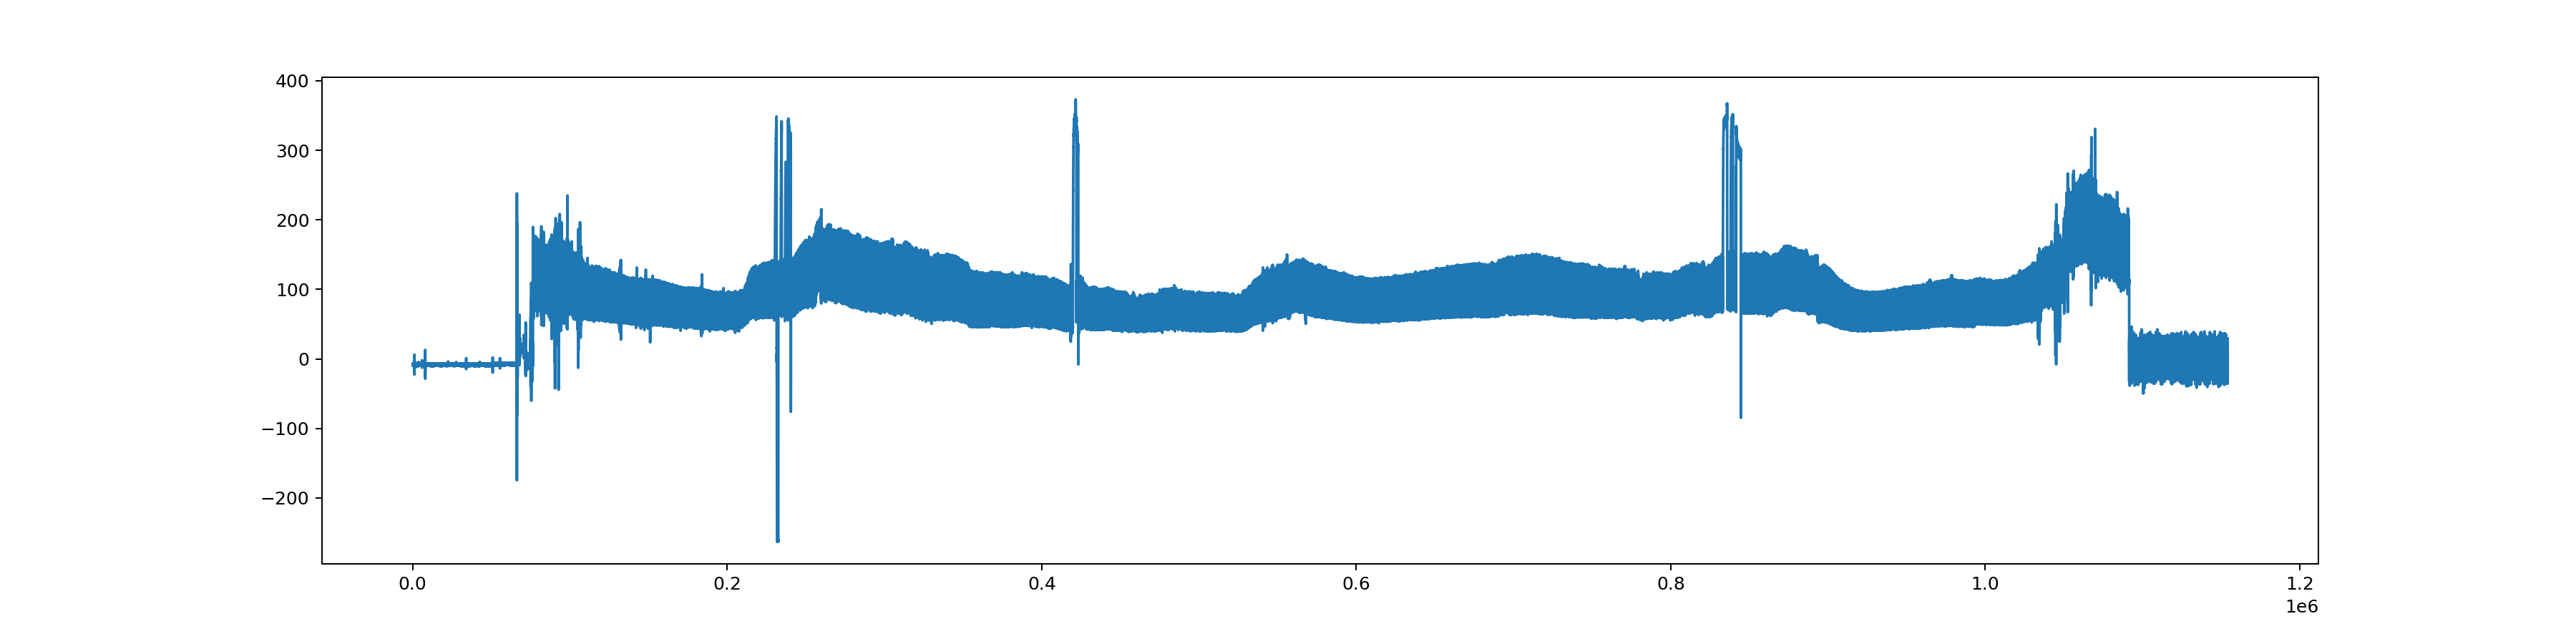

In [35]:
%matplotlib notebook

track_names = ['SNUADC/ART']
vf = vitaldb.VitalFile(1, track_names)
samples = vf.to_numpy(track_names, 1/100)

plt.figure(figsize=(20, 5))
plt.plot(samples[:, 0])
plt.show()

In [38]:
vf.get_track_names()

['SNUADC/ART']

### Determine Which Tracks are in All Vital Files

In [26]:
dataFolder = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files'
fileList = os.listdir(dataFolder)

sbp_list = []
dbp_list = []
mbp_list = []
hr_list = []
temp_list = []
rr_list = []
bis_list = []

for file in fileList:
    
    print(file)
    
    # get current file
    curFile = os.path.join(dataFolder, file)
    
    # read track list
    curTracks = vitaldb.vital_trks(curFile)
    
    # check if tracks exist
    if 'Solar8000/ART_SBP' in curTracks:
        sbp_list.append(file)
        
    if 'Solar8000/ART_DBP' in curTracks:
        dbp_list.append(file)
        
    if 'Solar8000/ART_MBP' in curTracks:
        mbp_list.append(file)
        
    if 'Solar8000/HR' in curTracks:
        hr_list.append(file)
        
    if 'Solar8000/BT' in curTracks:
        temp_list.append(file)
        
    if 'Solar8000/RR' in curTracks:
        rr_list.append(file)
        
    if 'BIS/BIS' in curTracks:
        bis_list.append(file)
        
print('done!')

0001.vital
0002.vital
0003.vital
0004.vital
0005.vital
0006.vital
0007.vital
0008.vital
0009.vital
0010.vital
0011.vital
0012.vital
0013.vital
0014.vital
0015.vital
0016.vital
0017.vital
0018.vital
0019.vital
0020.vital
0021.vital
0022.vital
0023.vital
0024.vital
0025.vital
0026.vital
0027.vital
0028.vital
0029.vital
0030.vital
0031.vital
0032.vital
0033.vital
0034.vital
0035.vital
0036.vital
0037.vital
0038.vital
0039.vital
0040.vital
0041.vital
0042.vital
0043.vital
0044.vital
0045.vital
0046.vital
0047.vital
0048.vital
0049.vital
0050.vital
0051.vital
0052.vital
0053.vital
0054.vital
0055.vital
0056.vital
0057.vital
0058.vital
0059.vital
0060.vital
0061.vital
0062.vital
0063.vital
0064.vital
0065.vital
0066.vital
0067.vital
0068.vital
0069.vital
0070.vital
0071.vital
0072.vital
0073.vital
0074.vital
0075.vital
0076.vital
0077.vital
0078.vital
0079.vital
0080.vital
0081.vital
0082.vital
0083.vital
0084.vital
0085.vital
0086.vital
0087.vital
0088.vital
0089.vital
0090.vital
0091.vital

0746.vital
0747.vital
0748.vital
0749.vital
0750.vital
0751.vital
0752.vital
0753.vital
0754.vital
0755.vital
0756.vital
0757.vital
0758.vital
0759.vital
0760.vital
0761.vital
0762.vital
0763.vital
0764.vital
0765.vital
0766.vital
0767.vital
0768.vital
0769.vital
0770.vital
0771.vital
0772.vital
0773.vital
0774.vital
0775.vital
0776.vital
0777.vital
0778.vital
0779.vital
0780.vital
0781.vital
0782.vital
0783.vital
0784.vital
0785.vital
0786.vital
0787.vital
0788.vital
0789.vital
0790.vital
0791.vital
0792.vital
0793.vital
0794.vital
0795.vital
0796.vital
0797.vital
0798.vital
0799.vital
0800.vital
0801.vital
0802.vital
0803.vital
0804.vital
0805.vital
0806.vital
0807.vital
0808.vital
0809.vital
0810.vital
0811.vital
0812.vital
0813.vital
0814.vital
0815.vital
0816.vital
0817.vital
0818.vital
0819.vital
0820.vital
0821.vital
0822.vital
0823.vital
0824.vital
0825.vital
0826.vital
0827.vital
0828.vital
0829.vital
0830.vital
0831.vital
0832.vital
0833.vital
0834.vital
0835.vital
0836.vital

1491.vital
1492.vital
1493.vital
1494.vital
1495.vital
1496.vital
1497.vital
1498.vital
1499.vital
1500.vital
1501.vital
1502.vital
1503.vital
1504.vital
1505.vital
1506.vital
1507.vital
1508.vital
1509.vital
1510.vital
1511.vital
1512.vital
1513.vital
1514.vital
1515.vital
1516.vital
1517.vital
1518.vital
1519.vital
1520.vital
1521.vital
1522.vital
1523.vital
1524.vital
1525.vital
1526.vital
1527.vital
1528.vital
1529.vital
1530.vital
1531.vital
1532.vital
1533.vital
1534.vital
1535.vital
1536.vital
1537.vital
1538.vital
1539.vital
1540.vital
1541.vital
1542.vital
1543.vital
1544.vital
1545.vital
1546.vital
1547.vital
1548.vital
1549.vital
1550.vital
1551.vital
1552.vital
1553.vital
1554.vital
1555.vital
1556.vital
1557.vital
1558.vital
1559.vital
1560.vital
1561.vital
1562.vital
1563.vital
1564.vital
1565.vital
1566.vital
1567.vital
1568.vital
1569.vital
1570.vital
1571.vital
1572.vital
1573.vital
1574.vital
1575.vital
1576.vital
1577.vital
1578.vital
1579.vital
1580.vital
1581.vital

2236.vital
2237.vital
2238.vital
2239.vital
2240.vital
2241.vital
2242.vital
2243.vital
2244.vital
2245.vital
2246.vital
2247.vital
2248.vital
2249.vital
2250.vital
2251.vital
2252.vital
2253.vital
2254.vital
2255.vital
2256.vital
2257.vital
2258.vital
2259.vital
2260.vital
2261.vital
2262.vital
2263.vital
2264.vital
2265.vital
2266.vital
2267.vital
2268.vital
2269.vital
2270.vital
2271.vital
2272.vital
2273.vital
2274.vital
2275.vital
2276.vital
2277.vital
2278.vital
2279.vital
2280.vital
2281.vital
2282.vital
2283.vital
2284.vital
2285.vital
2286.vital
2287.vital
2288.vital
2289.vital
2290.vital
2291.vital
2292.vital
2293.vital
2294.vital
2295.vital
2296.vital
2297.vital
2298.vital
2299.vital
2300.vital
2301.vital
2302.vital
2303.vital
2304.vital
2305.vital
2306.vital
2307.vital
2308.vital
2309.vital
2310.vital
2311.vital
2312.vital
2313.vital
2314.vital
2315.vital
2316.vital
2317.vital
2318.vital
2319.vital
2320.vital
2321.vital
2322.vital
2323.vital
2324.vital
2325.vital
2326.vital

2981.vital
2982.vital
2983.vital
2984.vital
2985.vital
2986.vital
2987.vital
2988.vital
2989.vital
2990.vital
2991.vital
2992.vital
2993.vital
2994.vital
2995.vital
2996.vital
2997.vital
2998.vital
2999.vital
3000.vital
3001.vital
3002.vital
3003.vital
3004.vital
3005.vital
3006.vital
3007.vital
3008.vital
3009.vital
3010.vital
3011.vital
3012.vital
3013.vital
3014.vital
3015.vital
3016.vital
3017.vital
3018.vital
3019.vital
3020.vital
3021.vital
3022.vital
3023.vital
3024.vital
3025.vital
3026.vital
3027.vital
3028.vital
3029.vital
3030.vital
3031.vital
3032.vital
3033.vital
3034.vital
3035.vital
3036.vital
3037.vital
3038.vital
3039.vital
3040.vital
3041.vital
3042.vital
3043.vital
3044.vital
3045.vital
3046.vital
3047.vital
3048.vital
3049.vital
3050.vital
3051.vital
3052.vital
3053.vital
3054.vital
3055.vital
3056.vital
3057.vital
3058.vital
3059.vital
3060.vital
3061.vital
3062.vital
3063.vital
3064.vital
3065.vital
3066.vital
3067.vital
3068.vital
3069.vital
3070.vital
3071.vital

3726.vital
3727.vital
3728.vital
3729.vital
3730.vital
3731.vital
3732.vital
3733.vital
3734.vital
3735.vital
3736.vital
3737.vital
3738.vital
3739.vital
3740.vital
3741.vital
3742.vital
3743.vital
3744.vital
3745.vital
3746.vital
3747.vital
3748.vital
3749.vital
3750.vital
3751.vital
3752.vital
3753.vital
3754.vital
3755.vital
3756.vital
3757.vital
3758.vital
3759.vital
3760.vital
3761.vital
3762.vital
3763.vital
3764.vital
3765.vital
3766.vital
3767.vital
3768.vital
3769.vital
3770.vital
3771.vital
3772.vital
3773.vital
3774.vital
3775.vital
3776.vital
3777.vital
3778.vital
3779.vital
3780.vital
3781.vital
3782.vital
3783.vital
3784.vital
3785.vital
3786.vital
3787.vital
3788.vital
3789.vital
3790.vital
3791.vital
3792.vital
3793.vital
3794.vital
3795.vital
3796.vital
3797.vital
3798.vital
3799.vital
3800.vital
3801.vital
3802.vital
3803.vital
3804.vital
3805.vital
3806.vital
3807.vital
3808.vital
3809.vital
3810.vital
3811.vital
3812.vital
3813.vital
3814.vital
3815.vital
3816.vital

4471.vital
4472.vital
4473.vital
4474.vital
4475.vital
4476.vital
4477.vital
4478.vital
4479.vital
4480.vital
4481.vital
4482.vital
4483.vital
4484.vital
4485.vital
4486.vital
4487.vital
4488.vital
4489.vital
4490.vital
4491.vital
4492.vital
4493.vital
4494.vital
4495.vital
4496.vital
4497.vital
4498.vital
4499.vital
4500.vital
4501.vital
4502.vital
4503.vital
4504.vital
4505.vital
4506.vital
4507.vital
4508.vital
4509.vital
4510.vital
4511.vital
4512.vital
4513.vital
4514.vital
4515.vital
4516.vital
4517.vital
4518.vital
4519.vital
4520.vital
4521.vital
4522.vital
4523.vital
4524.vital
4525.vital
4526.vital
4527.vital
4528.vital
4529.vital
4530.vital
4531.vital
4532.vital
4533.vital
4534.vital
4535.vital
4536.vital
4537.vital
4538.vital
4539.vital
4540.vital
4541.vital
4542.vital
4543.vital
4544.vital
4545.vital
4546.vital
4547.vital
4548.vital
4549.vital
4550.vital
4551.vital
4552.vital
4553.vital
4554.vital
4555.vital
4556.vital
4557.vital
4558.vital
4559.vital
4560.vital
4561.vital

5216.vital
5217.vital
5218.vital
5219.vital
5220.vital
5221.vital
5222.vital
5223.vital
5224.vital
5225.vital
5226.vital
5227.vital
5228.vital
5229.vital
5230.vital
5231.vital
5232.vital
5233.vital
5234.vital
5235.vital
5236.vital
5237.vital
5238.vital
5239.vital
5240.vital
5241.vital
5242.vital
5243.vital
5244.vital
5245.vital
5246.vital
5247.vital
5248.vital
5249.vital
5250.vital
5251.vital
5252.vital
5253.vital
5254.vital
5255.vital
5256.vital
5257.vital
5258.vital
5259.vital
5260.vital
5261.vital
5262.vital
5263.vital
5264.vital
5265.vital
5266.vital
5267.vital
5268.vital
5269.vital
5270.vital
5271.vital
5272.vital
5273.vital
5274.vital
5275.vital
5276.vital
5277.vital
5278.vital
5279.vital
5280.vital
5281.vital
5282.vital
5283.vital
5284.vital
5285.vital
5286.vital
5287.vital
5288.vital
5289.vital
5290.vital
5291.vital
5292.vital
5293.vital
5294.vital
5295.vital
5296.vital
5297.vital
5298.vital
5299.vital
5300.vital
5301.vital
5302.vital
5303.vital
5304.vital
5305.vital
5306.vital

5961.vital
5962.vital
5963.vital
5964.vital
5965.vital
5966.vital
5967.vital
5968.vital
5969.vital
5970.vital
5971.vital
5972.vital
5973.vital
5974.vital
5975.vital
5976.vital
5977.vital
5978.vital
5979.vital
5980.vital
5981.vital
5982.vital
5983.vital
5984.vital
5985.vital
5986.vital
5987.vital
5988.vital
5989.vital
5990.vital
5991.vital
5992.vital
5993.vital
5994.vital
5995.vital
5996.vital
5997.vital
5998.vital
5999.vital
6000.vital
6001.vital
6002.vital
6003.vital
6004.vital
6005.vital
6006.vital
6007.vital
6008.vital
6009.vital
6010.vital
6011.vital
6012.vital
6013.vital
6014.vital
6015.vital
6016.vital
6017.vital
6018.vital
6019.vital
6020.vital
6021.vital
6022.vital
6023.vital
6024.vital
6025.vital
6026.vital
6027.vital
6028.vital
6029.vital
6030.vital
6031.vital
6032.vital
6033.vital
6034.vital
6035.vital
6036.vital
6037.vital
6038.vital
6039.vital
6040.vital
6041.vital
6042.vital
6043.vital
6044.vital
6045.vital
6046.vital
6047.vital
6048.vital
6049.vital
6050.vital
6051.vital

In [27]:
print(len(sbp_list))
print(len(dbp_list))
print(len(mbp_list))
print(len(hr_list))
print(len(temp_list))
print(len(rr_list))
print(len(bis_list))

3528
3530
3527
6388
5917
1294
5566


In [30]:
hr_list

['0001.vital',
 '0002.vital',
 '0003.vital',
 '0004.vital',
 '0005.vital',
 '0006.vital',
 '0007.vital',
 '0008.vital',
 '0009.vital',
 '0010.vital',
 '0011.vital',
 '0012.vital',
 '0013.vital',
 '0014.vital',
 '0015.vital',
 '0016.vital',
 '0017.vital',
 '0018.vital',
 '0019.vital',
 '0020.vital',
 '0021.vital',
 '0022.vital',
 '0023.vital',
 '0024.vital',
 '0025.vital',
 '0026.vital',
 '0027.vital',
 '0028.vital',
 '0029.vital',
 '0030.vital',
 '0031.vital',
 '0032.vital',
 '0033.vital',
 '0034.vital',
 '0035.vital',
 '0036.vital',
 '0037.vital',
 '0038.vital',
 '0039.vital',
 '0040.vital',
 '0041.vital',
 '0042.vital',
 '0043.vital',
 '0044.vital',
 '0045.vital',
 '0046.vital',
 '0047.vital',
 '0048.vital',
 '0049.vital',
 '0050.vital',
 '0051.vital',
 '0052.vital',
 '0053.vital',
 '0054.vital',
 '0055.vital',
 '0056.vital',
 '0057.vital',
 '0058.vital',
 '0059.vital',
 '0060.vital',
 '0061.vital',
 '0062.vital',
 '0063.vital',
 '0064.vital',
 '0065.vital',
 '0066.vital',
 '0067.vit

In [36]:
# import data
dataFile = r'C:\Users\ta1031742\OneDrive - Bose Corporation\Documents\Admin\Northeastern\DS5500-Capstone\Data\vitaldb\vitaldb-a-high-fidelity-multi-parameter-vital-signs-database-in-surgical-patients-1.0.0\vital_files\0001.vital'

# read track list
vitaldb.vital_trks(dataFile)

track_names = ['EVENT', 'Solar8000/RR', 'Solar8000/HR']
df = vitaldb.vital_recs(dataFile, track_names=track_names, return_datetime=True, return_pandas=True)

print(df.shape)
df.head()

ZeroDivisionError: float division by zero